In [43]:
#PROGRAMA PARA BALANCEAMENTO DE CLASSES 

#import io
#import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("dados_exe1.csv", header=0)
print(df.head())
print(df["famhist"])


   row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1  
0      Present
1       Absent
2      Present
3      Present
4      Present
        ...   
457     Absent
458     Absent
459     Absent
460     Absent
461    Present
Name: famhist, Length: 462, dtype: object


In [44]:
# Codificar valores categóricos da coluna "famhist" para inteiros
df["famhist"] = df["famhist"].astype('category')
#Separa os dados em uma lista finita com duas categorias
df["famhist"] = df["famhist"].cat.codes
print(df["famhist"])
print(df.head())

0      1
1      0
2      1
3      1
4      1
      ..
457    0
458    0
459    0
460    0
461    1
Name: famhist, Length: 462, dtype: int8
   row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11        1     49    25.30    97.20   
1          2  144     0.01  4.41      28.61        0     55    28.87     2.06   
2          3  118     0.08  3.48      32.28        1     52    29.14     3.81   
3          4  170     7.50  6.41      38.03        1     51    31.99    24.26   
4          5  134    13.60  3.50      27.78        1     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1  


In [45]:
#Cria cada item da lista com um código

# separar dados
y = df.iloc[:,-1]
x = df.iloc[:,:-1] #Pega todas as colunas menos a última

print("Tamanho do Dataset Completo {} Amostras".format(len(x)))
print("Classe '0' {} amostras | Classe '1' {} Amostras".format(y.value_counts()[0], y.value_counts()[1]))
print("")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20, shuffle=True)

print("Tamanho do Dataset Treino {} Amostras".format(len(x_train)))
print("Classe '0' {} amostras | Classe '1' {} Amostras".format(y_train.value_counts()[0], y_train.value_counts()[1]))

print("Tamanho do Dataset Teste {} Amostras".format(len(x_test)))
print("Classe '0' {} amostras | Classe '1' {} Amostras".format(y_test.value_counts()[0], y_test.value_counts()[1]))

Tamanho do Dataset Completo 462 Amostras
Classe '0' 302 amostras | Classe '1' 160 Amostras

Tamanho do Dataset Treino 323 Amostras
Classe '0' 216 amostras | Classe '1' 107 Amostras
Tamanho do Dataset Teste 139 Amostras
Classe '0' 86 amostras | Classe '1' 53 Amostras


In [46]:
# DEPOIS DE SEPARADO E BALANCEADO ELE ESTÁ APTO PARA SER TREINADO


# modelo a ser utilizado
from sklearn import svm

model = svm.LinearSVC(max_iter=50, random_state=0)
model.fit(x_train, y_train)



LinearSVC(max_iter=50, random_state=0)

In [47]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0]
47     1
290    0
13     0
269    1
29     1
      ..
310    1
89     0
21     0
128    1
449    1
Name: chd, Length: 139, dtype: int64


In [48]:
from sklearn.metrics import confusion_matrix
import seaborn

cm = confusion_matrix(y_test, y_pred)
print(cm)
# obter contagens de observações
tn, fp, fn, tp = cm.ravel()

[[72 14]
 [34 19]]


Confusion Matrix : 


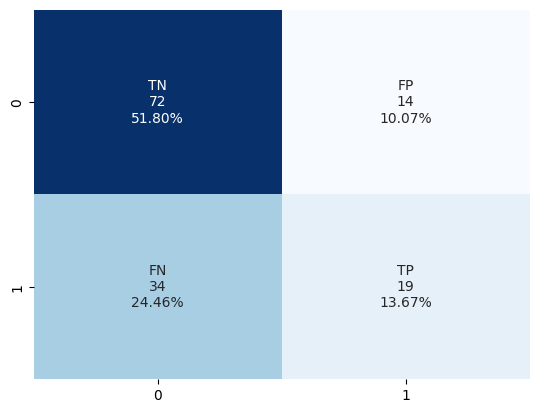

In [50]:
# Visualização da Matriz de Confusão
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
seaborn.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)

print("Confusion Matrix : ")


In [ ]:
accuracy = (tp+tn)/(tp+fp+tn+fn)
print("Acurácia de {0:0.2f}%".format(accuracy*100))
     
precision = (tp)/(tp+fp)
print("Precisão de {0:0.2f}%".format(precision*100))

recall = (tp)/(tp+fn)
print("Recall de {0:0.2f}%".format(recall*100))

f1 = (2*precision*recall)/(recall+precision)
print("F1 - Score de {0:0.2f}%".format(f1*100))

Acurácia de 65.47%
Precisão de 57.58%
Recall de 35.85%
F1 - Score de 44.19%
